<a href="https://colab.research.google.com/github/anishsoni29/Data-Analysis/blob/main/Indian_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Loading the Dataset

In [66]:
#loading the dataset
india_hp = pd.read_csv('House Price India.csv')
print(india_hp)

               id   Date  ...  Distance from the airport    Price
0      6762810145  42491  ...                         58  2380000
1      6762810635  42491  ...                         51  1400000
2      6762810998  42491  ...                         53  1200000
3      6762812605  42491  ...                         76   838000
4      6762812919  42491  ...                         51   805000
...           ...    ...  ...                        ...      ...
14615  6762830250  42734  ...                         76   221700
14616  6762830339  42734  ...                         59   219200
14617  6762830618  42734  ...                         64   209000
14618  6762830709  42734  ...                         54   205000
14619  6762831463  42734  ...                         55   146000

[14620 rows x 23 columns]


In [67]:
#getting the dimensions of the data
india_hp.shape

(14620, 23)

In [68]:
#getting the infof about the data
india_hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

In [69]:
#converting into Dataframe as a nice tabular view is presented
india_hp_dataframe = pd.DataFrame(india_hp)

In [70]:
print(india_hp_dataframe)

               id   Date  ...  Distance from the airport    Price
0      6762810145  42491  ...                         58  2380000
1      6762810635  42491  ...                         51  1400000
2      6762810998  42491  ...                         53  1200000
3      6762812605  42491  ...                         76   838000
4      6762812919  42491  ...                         51   805000
...           ...    ...  ...                        ...      ...
14615  6762830250  42734  ...                         76   221700
14616  6762830339  42734  ...                         59   219200
14617  6762830618  42734  ...                         64   209000
14618  6762830709  42734  ...                         54   205000
14619  6762831463  42734  ...                         55   146000

[14620 rows x 23 columns]


In [71]:
#printing the first 5 rows of the dataframe
india_hp_dataframe.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,10,3370,280,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [72]:
#checking the shape of the dataframe
india_hp_dataframe.shape

(14620, 23)

In [73]:
#checking for missing values
india_hp_dataframe.isnull().sum()

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

In [74]:
#dropping unnecessary info
house_price_dataframe= india_hp_dataframe.drop(['id', 'Date','number of views','grade of the house','Renovation Year','Distance from the airport','Number of schools nearby','Area of the house(excluding basement)', 'Area of the basement','living_area_renov','lot_area_renov','Postal Code','Longitude','Lattitude'], axis=1)
print(house_price_dataframe)

       number of bedrooms  number of bathrooms  ...  Built Year    Price
0                       5                 2.50  ...        1921  2380000
1                       4                 2.50  ...        1909  1400000
2                       5                 2.75  ...        1939  1200000
3                       4                 2.50  ...        2001   838000
4                       3                 2.00  ...        1929   805000
...                   ...                  ...  ...         ...      ...
14615                   2                 1.50  ...        1957   221700
14616                   3                 2.00  ...        1968   219200
14617                   2                 1.00  ...        1962   209000
14618                   4                 1.00  ...        1955   205000
14619                   3                 1.00  ...        1969   146000

[14620 rows x 9 columns]


In [75]:
#printing the shape of the dataset
house_price_dataframe.shape

(14620, 9)

In [76]:
#describing the dataset
house_price_dataframe.describe()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,condition of the house,Built Year,Price
count,14620.000000,14620.000000,14620.000000,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04
mean,3.379343,2.129583,2098.262996,1.509328e+04,1.502360,0.007661,3.430506,1970.926402,5.389322e+05
std,0.938719,0.769934,928.275721,3.791962e+04,0.540239,0.087193,0.664151,29.493625,3.675324e+05
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,1900.000000,7.800000e+04
25%,3.000000,1.750000,1440.000000,5.010750e+03,1.000000,0.000000,3.000000,1951.000000,3.200000e+05
50%,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,3.000000,1975.000000,4.500000e+05
75%,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,4.000000,1997.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,5.000000,2015.000000,7.700000e+06


Understanding the correlation b/w various features in the dataset
1. Positive Correlation
2. Negative Correlation

In [77]:
correlation = house_price_dataframe.corr()

<Axes: >

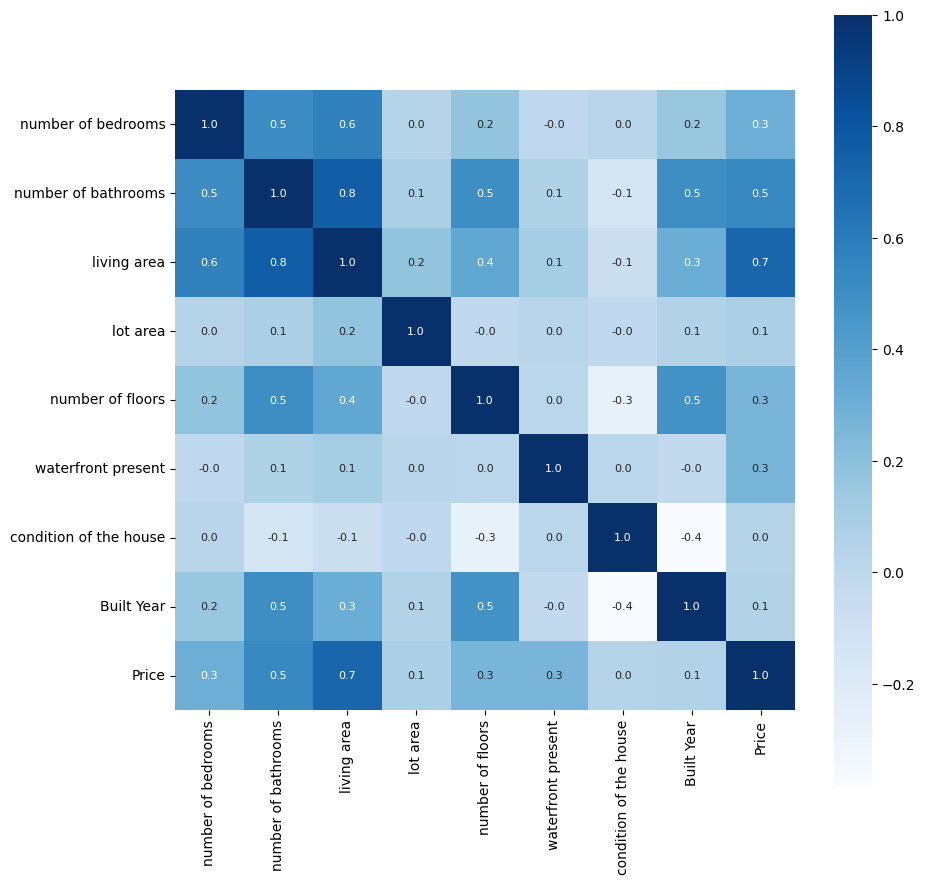

In [78]:
#constructing a heatmap to understand the correlation
plt.figure(figsize = (10,10))
sns.heatmap(correlation , cbar = True, square= True, fmt = '.1f', annot= True, annot_kws = {'size' :8},cmap = 'Blues')

Splitting the data and target

In [79]:
X = house_price_dataframe.drop(['Price'], axis =1)
Y= house_price_dataframe['Price']

In [80]:
#target value was the price, so saggrigating the data according to the price
print(X)
print(Y)

       number of bedrooms  ...  Built Year
0                       5  ...        1921
1                       4  ...        1909
2                       5  ...        1939
3                       4  ...        2001
4                       3  ...        1929
...                   ...  ...         ...
14615                   2  ...        1957
14616                   3  ...        1968
14617                   2  ...        1962
14618                   4  ...        1955
14619                   3  ...        1969

[14620 rows x 8 columns]
0        2380000
1        1400000
2        1200000
3         838000
4         805000
          ...   
14615     221700
14616     219200
14617     209000
14618     205000
14619     146000
Name: Price, Length: 14620, dtype: int64


Splitting the data into training data and testing data

In [81]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [82]:
print(X.shape, X_train.shape, X_test.shape)

(14620, 8) (11696, 8) (2924, 8)


Model Training

In [83]:
model = XGBRegressor()

In [84]:
#training the model with training data
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Evaluation

In [93]:
#prediction on training data
training_data_prediction = model.predict(X_train)

In [86]:
print(training_data_prediction)

[404871.97 272529.9  482852.62 ... 376208.84 404514.2  786997.56]


In [94]:
#R Squared Error
score_1 = metrics.r2_score(Y_train, training_data_prediction)
print(score_1)

0.8830956913703693


In [90]:
#Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train,training_data_prediction)
print(score_2)

93876.04864443507


In [88]:
#The mean absolute error is very high which means there is something wrong with the feature_selection

Visualizing the Actual Prices and Predicted Prices

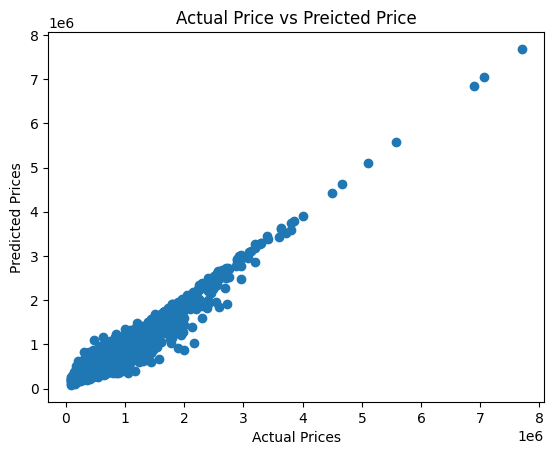

In [95]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

Prediction on Test Data

In [98]:
#accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [99]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.6302502166530028
Mean Absolute Error :  137350.80443634576


In [ ]:
#This shows that the data being tested will not give out accurate results.
#ERROR: Caused due to wrond feature selection.